Blogs: <br />
1) https://nicolovaligi.com/deep-learning-models-semantic-segmentation.html <br />
2) http://blog.qure.ai/notes/semantic-segmentation-deep-learning-review <br />
3) https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import pickle
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model, load_model

/home/sudeep/.conda/envs/Keras2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMAGES_DIR = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/img/"
TRAINING_IMAGES = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/train.txt"
TEST_IMAGES = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/val.txt"
SEGMENTATION_CLASSES = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/cls/"

In [3]:
train_images = open(TRAINING_IMAGES).read().split('\n')[:-1]
len(train_images)

8498

(375, 500, 3)


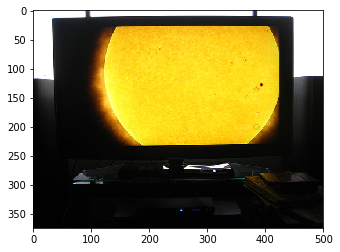

In [4]:
im = cv2.cvtColor(cv2.imread(IMAGES_DIR+train_images[0]+'.jpg'), cv2.COLOR_BGR2RGB)
print(im.shape)
plt.imshow(im)

In [5]:
cls = sio.loadmat(SEGMENTATION_CLASSES+train_images[0]+'.mat')

We have 20 classes. <br />
[0][0][0] has the one hot vector representation for the class of the pixel. shape 20 X 2D_image_shape <br/>
[0][0][1] is basically the argmax over axis 0 of [0][0][0] <br/>
[0][0][2] tells you about the list of classes the image contains 

[[20]]


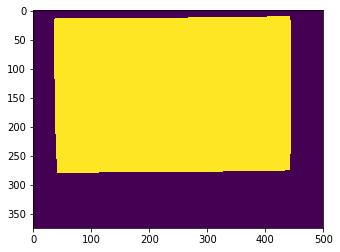

In [6]:
print(cls['GTcls'][0][0][2])
plt.imshow(cls['GTcls'][0][0][1])

Quick statistics: <br />
1) Shapes of images <br />
2) No. of images that contain a particular class

In [7]:
shapes = {}
for i in range(len(train_images)):
    x = train_images[i]
    shape = cv2.imread(IMAGES_DIR+x+'.jpg').shape[:2]
    if shape in shapes:
        shapes[shape].append(i)
    else:
        shapes[shape] = [1]
print([len(shapes[x]) for x in shapes.keys()])

KeyboardInterrupt: 

In [ ]:
shapes_len = {}
for key, value in shapes.items():
    shapes_len[key] = len(value)
print(shapes_len)

In [ ]:
classes = [0 for _ in range(21)]
for i in range(len(train_images)):
    x = train_images[i]
    cls = sio.loadmat(SEGMENTATION_CLASSES+x+'.mat')['GTcls'][0][0]
    cls = cls[2]
    #print(cls.shape)
    assert(cls.shape[1] == 1)
    for cl in cls.T[0]:
        classes[cl] += 1
print(classes)

Subset has Birds, Cars, Pets and Humans <br/>

In [ ]:
subset = {3, 7, 12, 15}
indices = []
for i in range(len(train_images)):
    x = train_images[i]
    cls = sio.loadmat(SEGMENTATION_CLASSES+x+'.mat')['GTcls'][0][0]
    cls = cls[2]
    #print(cls.shape)
    assert(cls.shape[1] == 1)
    cls = cls.T[0]
    if len(cls) <= 4:
        flag = True
        for cl in cls:
            if cl not in subset:
                flag = False
                break
        if flag:
            indices.append(i)
print(len(indices))

with open("subset=3,7,12,15_indices.pkl", "wb") as f: <br />
    pickle.dump(indices, f)

In [4]:
with open("subset=3,7,12,15_indices.pkl", "rb") as f:
    indices = pickle.load(f)
len(indices)

2728

In [5]:
train_subset = [train_images[i] for i in indices]

(375, 500, 3)


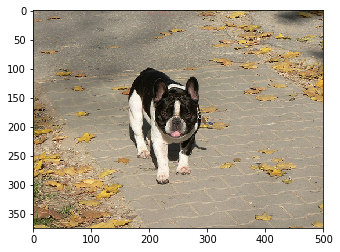

[[12]]


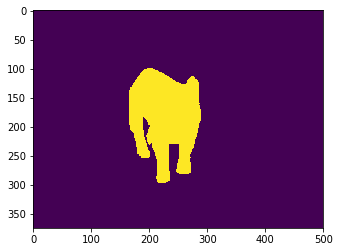

In [12]:
x = np.random.randint(len(train_subset))
im = cv2.cvtColor(cv2.imread(IMAGES_DIR+train_subset[x]+'.jpg'), cv2.COLOR_BGR2RGB)
print(im.shape)
plt.imshow(im)
plt.show()
cls = sio.loadmat(SEGMENTATION_CLASSES+train_subset[x]+'.mat')['GTcls'][0][0]
print(cls[2])
plt.imshow(cls[1])
plt.show()

In [162]:
print(cls[1].tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [178]:
X = np.array([cls[0][i, 0].toarray() for i in range(20)])
X.shape

(20, 375, 500)

In [188]:
print(np.argmax(X, axis = 0).tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

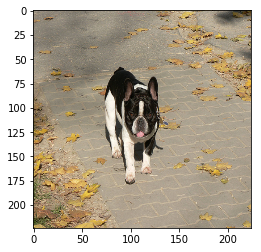

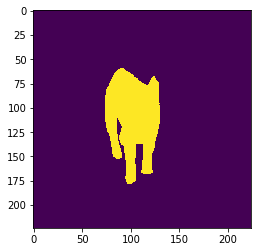

In [13]:
im2 = cv2.resize(im, (224, 224))
plt.imshow(im2)
plt.show()
res = cv2.resize(cls[1], (224, 224), interpolation=cv2.INTER_NEAREST)
plt.imshow(res)
plt.show()


In [189]:
res

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [180]:
X_res = cv2.resize(np.argmax(X, axis =0), (224, 224), interpolation=cv2.INTER_NEAREST)
print(X_res.tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
def VGG_model():
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    l1 = model.layers.pop()
    output = l1.input
    for layer in model.layers:
        layer.trainable = False
    return Model(inputs=model.input, outputs = output)

In [8]:
vgg = VGG_model()
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1]:
def build_model(prev_model):
    X = prev_model.output
    X = Conv2DTranspose(256, (3, 3), strides=(2,2), padding="same")(X)
    X = Conv2DTranspose(128, (3, 3), strides=(2,2), padding="same")(X)
    X = Conv2DTranspose(64, (3, 3), strides=(2,2), padding="same")(X)
    X = Conv2DTranspose(32, (3, 3), strides=(2,2), padding="same")(X)
    X = Conv2D(5, (1, 1))(X)
    X = Reshape((224*224, 5))(X)
    model = Model(inputs=prev_model.input, outputs=X)
    return model

In [10]:
top_model = build_model(vgg)

In [11]:
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

top_model.save('Uncompiled_model.h5')

In [216]:
def build_dataset(): 
    X_train = []
    Y_train = []
    for i in range(len(train_subset)):
        im = cv2.cvtColor(cv2.imread(IMAGES_DIR+train_subset[i]+'.jpg'), cv2.COLOR_BGR2RGB)
        im = im.astype(np.float32)
        im = cv2.resize(im, (224, 224), interpolation=cv2.INTER_NEAREST)
        im = im/255.
        assert(im.dtype==np.float32)
        #plt.imshow(im)
        #plt.show()
        cls = sio.loadmat(SEGMENTATION_CLASSES+train_subset[i]+'.mat')['GTcls'][0][0]
        res = cv2.resize(cls[1], (224, 224), interpolation=cv2.INTER_NEAREST)
        #plt.imshow(cls[1])
        #plt.show()
        X_train.append(im)
        Y_train.append(res)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    return X_train, Y_train

In [217]:
X_train, Y_train = build_dataset()

In [234]:
Y_train.shape, Y_train.dtype

((2728, 224, 224), dtype('uint8'))

np.save('Subset_2728_X_train', X_train)

np.save('Subset_2728_Y_train', Y_train)

In [2]:
Y_train = np.load('Subset_2728_Y_train.npy')
Y_train.shape, Y_train.dtype

((2728, 224, 224), dtype('uint8'))

In [3]:
np.max(Y_train)

4

In [27]:
'''
def vec_translate(a, my_dict):    
    return np.vectorize(my_dict.__getitem__)(a)

transdict = {0:0, 3:1,7:2,12:3,15:4}
Y_train_2 = vec_translate(Y_train, transdict)
'''

In [4]:
X_train = np.load('Subset_2728_X_train.npy')

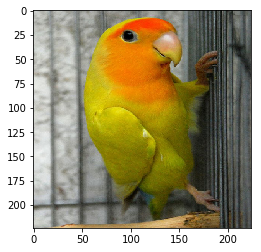

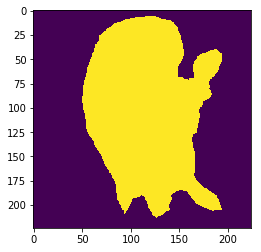

In [44]:
x = np.random.randint(len(X_train))
image = X_train[x]
seg = Y_train_2[x]
plt.imshow(image)
plt.show()
plt.imshow(seg)
plt.show()

In [45]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [46]:
Y_t2 = Y_train_2.reshape(-1, Y_train_2.shape[1]**2)

In [257]:
print(Y_t2[0].tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [261]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(dtype=np.uint8)


In [262]:
del X_train

In [ ]:
Y_one_hot = enc.fit_transform(Y_t2)